# CÁLCULO DE RAÍZES E SISTEMAS DE EQUAÇÕES E INEQUAÇÕES

Em vários problemas de engenharia e exatas nos deparamos com situações no qual é importante encontrar as raízes de uma equação algébrica ou transcendental, na forma $ f(x) = 0 $. Uma equação, de acordo com Krantz (2001) é uma afirmação de igualdade, geralmente entre duas expressões matemáticas $f$, $g$,  envolvendo números, parâmetros e variáveis. Dessa forma, uma solução de uma equação em uma incógnita ($"x"$, por exemplo) compreende o valor da incógnita que determina a equação verdadeira. Em algumas situações é possível encontrar uma raíz através da inspeção visual de um gráfico, no qual o ponto de interceptação do eixo $"x"$ ou o ponto de interceptação entre os gráficos das equações, representa uma raiz do problema. Apesar de impreciso, o método gráfico é útil para definir quais os pontos inicias de um método computacional. Na linguagem Julia há pacotes que implementam diversos algoritmos de resolução simbólica ou numérica. Neste capítulo utilizaremos os seguintes pacotes:


* **SymPy.jl**: O pacote `SymPy.jl` é uma biblioteca Python para matemática simbólica acessada localmente via pacote `PyCall.jl` e permite resolver equações e sistemas lineares. A função `solve()` permite resolver simbolicamente equações e sistemas lineares e `nsolve()` equações e sistemas não lineares numericamente. 


* **Roots.jl**: Este pacote implementa vários métodos numéricos (Bisseção, Newton, Secante, Halley e outros) para encontrar raízes de equações lineares e não lineares. A interface básica é através da função `find_root()`.


* **Polynomials.jl**: É um pacote exclusivo para manipulação de polinômios. Permite operações de aritmética básica, integração, diferenciação, avaliação e determinação de raizes em polinômios.


* **SunDials.jl**: Significa "SUite of Nonlinear and DIfferential/ALgebraic Equation Solvers", é um pacote para `Julia` que faz a interface para a biblioteca `Sundials` da biblioteca escrita em `C`.  Apresenta uma ótima velocidade de cálculo e permite resolver integrais de EDO, sistemas não lineares e outros.


* **NLsolve.jl**: O pacote `NLsolve.jl` resolve sistemas de equações não lineares. A função `nsolve()` permite utilizar diversos métodos numericos.

## RAIZES DE UMA EQUAÇÃO 

### SOLUÇÃO SYMBÓLICA

#### SYMPY.JL

A função `solve()` permite calcular as raízes de uma equação algébrica ou transcendente (nem todas é possível calcular simbolicamente, sendo então necessário uma solução numérica) com apenas uma incógnita e retorna um vetor contendo as soluções do tipo `Sym`. Sintaxe:
```julia
solve(equação, var)
```
Sendo:
* **equação**: equação algébrica expressa como uma expressão simbólica ou função genérica. Não funciona com função anônima;

* **var** : variável da equação algébrica.

Caso a função `solve()` retorne `[]` ou <span style="color:blue">raises NotImplementedError</span>, isto significa que o método empregado pelo função não conseguiu encontrar uma solução, porém ela poderá existir e será encontrada (caso exista em um dado intervalo) numericamente. 

Exemplo: Determinar as raízes da função $f(x) = x^2 - 3x - 2$ no intervalo $[-5, ~5]$

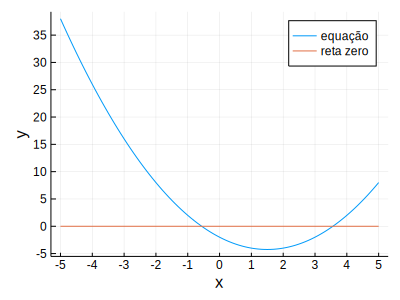

In [1]:
using Plots
gr()

plot(collect(-5:0.1:5), x -> x^2 - 3*x - 2, label = "equação", size = (400, 300),
    xaxis = ("x", -5:1:10),
    yaxis = ("y", -5:5:40))
plot!(collect(-5:0.1:5), zero, label = "reta zero")

De acordo com o gráfico, podemos observar que há duas raízes, sendo a primeira $x \thickapprox -0.5$ e segunda $x \thickapprox 3.5$. 

In [2]:
using SymPy 
@syms x

(x,)

In [3]:
solve(x^2 - 3*x - 2, x)

2-element Array{Sym,1}:
 3/2 - sqrt(17)/2
 3/2 + sqrt(17)/2

O resultado é do tipo simbólico, logo é interessante atribuir o resultado a duas variáveis $x_1$ e $x_2$ do tipo `float`.

In [4]:
x1, x2 = float(solve(x^2 - 3*x - 2, x))

2-element Array{Float64,1}:
 -0.5615528128088303
  3.5615528128088303

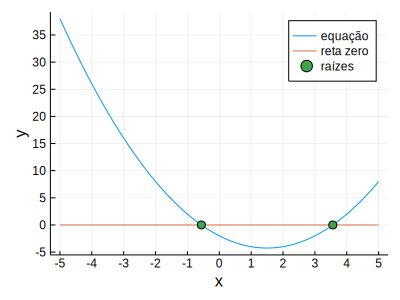

In [5]:
using Plots
gr()

plot(-5:0.1:5, x -> x^2 - 3*x - 2, label = "equação", 
    xaxis = ("x",  -5:1:10),
    yaxis = ("y", -5:5:40))
plot!(-5:0.1:5, zero, label = "reta zero")
scatter!([x1, x2], [0, 0], label  = "raízes", size = (400, 300) )

**Utilizando uma função genérica**

In [6]:
using SymPy
@syms x

(x,)

In [7]:
# Função genérica
f1(x) = x^2 - 3*x - 2

f1 (generic function with 1 method)

In [8]:
sol_f1 = solve(f1(x), x)

2-element Array{Sym,1}:
 3/2 - sqrt(17)/2
 3/2 + sqrt(17)/2

In [9]:
# tipo
typeof(sol_f1)

Array{Sym,1}

Ou ainda

In [10]:
raízes = float(solve(f1(x), x))

2-element Array{Float64,1}:
 -0.5615528128088303
  3.5615528128088303

A variável "raízes" é um vetor que contém os valores de $x_1$ e $x_2$. Dessa forma, podemos acessar somente o valor de $X_1$ ou de $X_2$

In [11]:
raízes[1], raízes[2]

(-0.5615528128088303, 3.5615528128088303)

**Equação de Gauss**

<img src="Figuras/gauss-espelhos-esfericos.png" align="center" width="300">
Uma vantagem especial do pacote `SymPy.jl` é a manipulação simbólica de fórmulas, permitindo resolver uma equação em relação a qualquer variável. No exemplo a seguir, encontraremos a relação entre o foco ($f$) e as distâncias do objeto ($p_o$) e imagem ($p_i$) à frete de um espelho esférico definido pela equação de Gauss, ou equação dos pontos conjugados: 


$ \displaystyle{\frac{1}{f} = \frac{1}{p_o} + \frac{1}{p_i}}$ 

In [12]:
using SymPy
@syms f p_o p_i

(f, p_o, p_i)

In [13]:
sol_f = solve(1/f - 1/p_o - 1/p_i, f)

1-element Array{Sym,1}:
 p_i*p_o/(p_i + p_o)

O foco $f$ pode ser calculado atribuíndo valores para as variáveis $p_o = 10$ e $p_i = 1$. É possível atribuição direta na forma $ f(10, 1) $ porém não há certeza se os valores atribídos para $ p_o $  e $ p_i $ serão 10 e 1 respectivamente. Dessa forma, a função `subs()` do `SymPy.jl` resolve este problema.

In [14]:
float(subs(sol_f[1], p_o =>10, p_i=>1))

0.9090909090909091

Para usar o resultado simbólico em uma função genérica ou anônima, use:

In [15]:
# função genérica
@eval F1(p_o, p_i) = $(Meta.parse(string(sol_f[1])))

F1 (generic function with 1 method)

In [16]:
F1(10, 1)

0.9090909090909091

In [17]:
# função anônima
F2 = convert(Function, sol_f[1])

#84 (generic function with 1 method)

In [18]:
F2(10, 1)

0.9090909090909092

Uma solução interessante é resolver a equação dos pontos conjugados em relação $p_i$. O resultado, $p_i = - \frac{f p_{o}}{f - p_{o}}$,  quando expresso em um gráfico nos diz que a distância da imagem formada tende para um valor constante igual à distância focal.

In [19]:
@eval F3(p_o, f) = $(Meta.parse(string(solve(1/f - 1/p_o - 1/p_i, p_i)[1])))

F3 (generic function with 1 method)

Para construir o gráfico, devemos variar $p_o$ entre os intervalos $[0:9]~$ e $~[11:100]$ excluíndo $p_o = 10cm$ que de acordo com as propriedades de formação de imagem dos espelhos esféricos determina uma imagem imprópria.

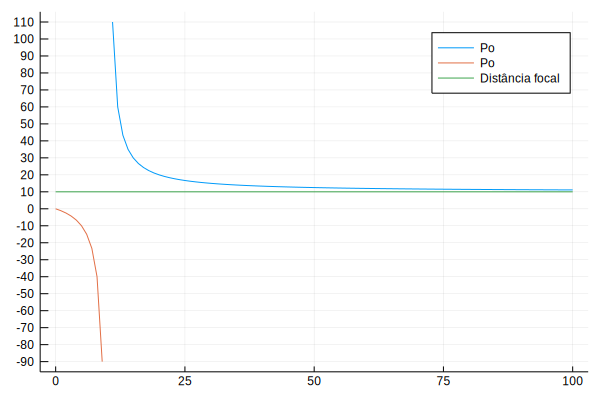

In [20]:
plot(11:100, F3.(11:100, 10), label = "Po")
plot!(0:9, F3.(0:9, 10), label = "Po")
plot!(0:100, fill(10, length(0:100)), label = "Distância focal", yticks=(-100:10:200))

**Polinômios**

A função `polyroots()` permite calcular polinômios simbolicamente e retorna um dicionário contendo as soluções do tipo `Dict{Any,Any}`. Sintaxe:
```julia
polyroots(equação, var) 
```
Sendo:
* **equação**: equação algébrica expressa como uma expressão simbólica ou função genérica. Não funciona com função anônima;
* **var** : variável da expressão algébrica.

A função `polyroots()`retorna um dicionário contendo os valores das raizes e multiplicidade ambos do tipo `Any`.

In [21]:
using SymPy
@syms x

(x,)

In [22]:
xp = polyroots(x^4 - x^2, x)

UndefVarError: UndefVarError: polyroots not defined

In [23]:
?SymPy

search: SymPy sympy sympy_plotting sympify SymPermutation SymPermutationGroup



`SymPy` package to interface with Python's [SymPy library](http://www.sympy.org) through `PyCall`.

The basic idea is that a new type – `Sym` – is made to hold symbolic objects.  For this type, the basic functions from SymPy and appropriate functions of `Julia` are overloaded for `Sym` objects so that the expressions are treated symbolically and not evaluated immediately. Instances of this type are created by the constructor `Sym`, the function `symbols` or the macro `@vars`.

On loading, a priviledged set of the functions from the `sympy` module are defined as generic functions with their first argument narrowed to symbolic types. Others may be accessed by qualification, as in `sympy.trigsimp`. Calling `import_from(sympy)` will import the rest. SymPy methods are called through Python's dot-call syntax.  To find documentation on SymPy functions and methods, one should refer to SymPy's [website](http://docs.sympy.org/latest/index.html).

Plotting is provided through the `Plots` interface. For details, see the help page for `sympy_plotting`.

The package tutorial provides many examples. This can be read on [GitHub](http://nbviewer.ipython.org/github/JuliaPy/SymPy.jl/blob/master/examples/tutorial.ipynb).


In [24]:
# Fórmula de Bhaskara
@syms a b c
roots(a*x^2 + b*x + c, x)

Dict{Any,Any} with 2 entries:
  -b/(2*a) - sqrt(-4*a*c + b^2)/(2*a) => 1
  -b/(2*a) + sqrt(-4*a*c + b^2)/(2*a) => 1

### SOLUÇÃO NUMÉRICA

Exemplo: Determinar numericamente as raízes da função $f(x) =  x\cdot cos(x)$ no intervalo $[0, 20]$.

In [25]:
# função genérica 
f2(x) =  x*cos(x) 

f2 (generic function with 1 method)

**Gráfico**

In [26]:
using Plots
gr()

Plots.GRBackend()

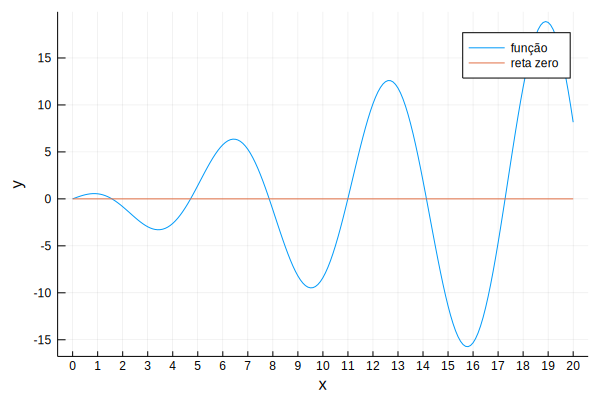

In [27]:
plot(0:0.1:20, f2, xlabel = "x", ylabel = "y", label = "função", 
    xaxis = ("x",  0:1:20),
    yaxis = ("y", -20:5:20))
plot!(0:0.1:20, zero, label = "reta zero")

#### SYMPY.JL

A função `nsolve()` do pacote `SymPy.jl` permite usar métodos de aproximação numérica para encontrar raízes de equações algébricas não-lineares e retorna resultado do tipo `Sym`. Sintaxe:
```julia
nsolve(equação, xi, opções) 
```
Sendo:
* **`equação`**: equação algébrica expressa como uma expressão simbólica ou função genérica. Não funciona com funções anônimas;
* **`xi`**: aproximação inicial da variavel da equação algébrica;
* **`opções`**: flags.

A função `nsolve()` retorna um valor do tipo `BigFloat`.

In [28]:
using SymPy
@syms x

(x,)

A função retorna um valor do tipo `BigFloat` que pode significar uma representação numérica grande para a maioria das aplicações. Com a flag `prec` podemos limitar o números de algarismos significativos.

In [29]:
raiz1 = nsolve(f2(x), 2, prec = 7)
raiz2 = nsolve(f2(x), 5, prec = 10)
raiz3 = nsolve(f2(x), 7, prec = 15)

@show raiz1
@show raiz2
@show raiz3;

raiz1 = 1.570796
raiz2 = 4.712388980
raiz3 = 7.85398163397448


In [30]:
#Testando. Veja que o resultado é bem próximo de zero.
@show f2(raiz1)
@show f2(raiz2)
@show f2(raiz3);

f2(raiz1) = 1.558377e-9
f2(raiz2) = -3.623842420e-11
f2(raiz3) = 2.40458836715224e-15


**Raízes dentro uma faixa de valores**

De acordo com gráfico de $y =  x \cdot cos(x)$ podemos visualizar que existem várias raízes no intervalo  [0, 20]. Para calcular as raízes utilizando o a função `nsolve()` será necessário uma `list comprehension`.

In [31]:
Raizes_nsolve = [Float64(nsolve(f2(x), i)) for i = 0:20]
sort!(Raizes_nsolve)  # ordena os resultados
unique(Raizes_nsolve) # filtra resultados repetidos

9-element Array{Float64,1}:
  0.0               
  1.5707963267948966
  4.71238898038469  
  7.853981633974483 
 10.995574287564276 
 14.137166941154069 
 17.278759594743864 
 20.420352248333657 
 23.56194490192345  

**Polinomios**

A função `nroots()` permite calcular polinômios numericamente e retorna um vetor contendo o resultado do tipo `Sym`. Sintaxe:

```julia
nroots(equação, n, maxsteps)  
```
Sendo:

* **equação**: equação algébrica expressa como uma expressão simbólica ou função genérica. Não funciona com função anônima;
* **n**: números de dígitos (15 padrão);
* **maxsteps**: número máximo de iterações a serem feitas (50 padrão).

A função `nroots()` retorna um vetor de dados simbólicos do tipo `SymPy.Sym`.

In [32]:
xnp = nroots(3*x^2 - 2*x + 5, n = 5)

2-element Array{Sym,1}:
 0.33333 - 1.2472*I
 0.33333 + 1.2472*I

Para acessar a sulução $0.33333−1.2472i$, use:

In [33]:
xnp[1]

0.33333 - 1.2472⋅ⅈ

#### ROOTS.JL

A função `find_zero()` é uma interface para um dos vários métodos numéricos implementados para encontrar zeros de uma função univariada e retorna resultado do tipo `Float64`. O método da secante é o padrão. Sintaxe:
```julia
find_zero(equação, xi, opções)
```
Para calcular várias raízes em um intervalo contínuo  [a, b]:
```julia
find_zeros(equação, a, b)
```
Sendo:
* **equação**: equação expressa através de uma função genérica ou anônima. A função `find_zero()` não funciona com expressões simbólicas;
* **xi**: aproximação inicial da variavel da equação algébrica;
* **opções**: 
 * xatol - tolerância absoluta para valores x; 
 * xrtol - tolerância relativa para valores de x; 
 * atol - tolerância absoluta para valores da função calculada;
 * rtol - tolerância relativa para valores da função calculada;
 * maxevals - limite no número máximo de iterações;
 * maxfnevals - limite no número máximo de avaliações da função calculada;
 * verbose - permite mostrar informações sobre o método utilizado;
 * método - exige informações sobre o método numérico empregado no cálculo do zero da função;
* **a, b**: intervalo contínuo.

Métodos numéricos disponíveis:

* **Bisseção()**: Utiliza o método da bisseção. Neste método não há necessidade de passar derivadas da função como argumento.

* **Roots.A42()**: Método que encontra a raiz de uma função contínua dentro de um intervalo fornecido [a, b], sem necessidade de passar derivadas da função como argumento. Baseia-se no algoritmo "4.2" descrito em:  "Algorithm 748: enclosing zeros of continuous functions" de autoria de G. E. Alefeld, F. A. Potra e Yixun Shi. DOI:10.1145/210089.210111.

* **FalsePosition()**: Utiliza o método da bissecção modificado conhecido como método da falsa posição. Não há necessidade de passar derivadas da função como argumento.

* **Order0()**: O método Order0 foi desenvolvido para ser uma alternativa robusta, embora possivelmente mais lenta, aos outros métodos de busca de raízes sem necessidade de passar derivadas da função como argumento. A implementação segue aproximadamente o algoritmo para resolver equações $f(x)= 0$ implementado na HP-34C. 

* **Order1() (método padrão)**: Implementa o método da secante. Não há necessidade de passar derivadas da equação como argumento.

* **Order2()**: Implementa o método de convergência quadrática de Steffensen, no qual permite encontrar raízes usando uma combinação do método de ponto fixo e do método de Aitken, sem necessidade de passar derivadas da função como argumento. 

* **Order5()**: Método que encontra raízes de equações não lineares sem necessidade de passar derivadas da função como argumento. É baseado no algoritmo " descrito em: "A New Fifth Order Derivative Free Newton-Type Method for Solving Nonlinear Equations" de autoria de Manoj Kumar, Akhilesh Kumar Singh e Akanksha Srivastava. http://dx.doi.org/10.12785/amis/090346.

* **Order8()**: Método que encontra raízes de equações não lineares sem necessidade de passar derivadas da função como argumento. É baseado no algoritmo descrito em: "New Eighth-Order Derivative-Free Methods for Solving Nonlinear Equations" de autoria de Rajinder Thukral. http://dx.doi.org/10.1155/2012/493456.

* **Order16()**: Método que encontra raízes de equações não lineares sem necessidade de passar derivadas da função como argumento. É baseado no algoritmo descrito em: "New Sixteenth-Order Derivative-Free Methods for Solving Nonlinear Equations" de autoria de Rajinder Thukral. http://article.sapub.org/10.5923.j.ajcam.20120203.08.html.

* **Roots.Newton()**: Implementa o método de Newton. A tupla, formada pela função e a primeira derivada, deve ser passada como argumento.

* **Roots.Halley()**: Implementa o método de Halley. A tupla, formada pela função, primeira e segunda derivada, deve ser passada como argumento.

In [34]:
f2(x) = x*cos(x)

f2 (generic function with 1 method)

In [35]:
using Roots

In [36]:
# Método da Secante (padrão)
find_zero(f2, 2)

1.5707963267948966

In [37]:
find_zero(f2, (1, 2), Roots.A42(), verbose = true)

Results of univariate zero finding:

* Converged to: 1.5707963267948966
* Algorithm: Roots.A42()
* iterations: 2
* function evaluations: 8
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = ( 1.0000000000000000,  2.0000000000000000)
(a_1, b_1) = ( 1.5000000000000000,  2.0000000000000000)
(a_2, b_2) = ( 1.5704429313643755,  1.5711187334545988)
(a_3, b_3) = ( 1.5707963267948966,  1.5707963267948968)



1.5707963267948966

Para utilizar os métodos de Newton e Halley é necessário passar a derivada primeira e segunda da função conforme os códigos abaixo:

In [38]:
# find_zero(f, f', xi, método)
find_zero((f2, -x*sin(x) + cos(x)), 2, Roots.Newton(), verbose = true)

Results of univariate zero finding:

* Converged to: 1.5707963267948966
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  2.0000000000000000,	 fx_0 = -0.8322936730942848
x_1 =  1.6275660508126313,	 fx_1 = -0.0923468542709272
x_2 =  1.5726527073612491,	 fx_2 = -0.0029194402467621
x_3 =  1.5707985133806537,	 fx_3 = -0.0000034346856566
x_4 =  1.5707963267979403,	 fx_4 = -0.0000000000047811
x_5 =  1.5707963267948966,	 fx_5 =  0.0000000000000001



1.5707963267948966

In [39]:
# find_zero(f, f', f'', xi, método)
find_zero((f2, -x*sin(x) + cos(x), -(x*cos(x) + 2*sin(x))), 2, Roots.Halley(), verbose = true)

Results of univariate zero finding:

* Converged to: 1.5707963267948968
* Algorithm: Roots.Halley()
* iterations: 3
* function evaluations: 12
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  2.0000000000000000,	 fx_0 = -0.8322936730942848
x_1 =  1.5942160077510819,	 fx_1 = -0.0373326173503296
x_2 =  1.5708033554411425,	 fx_2 = -0.0000110406211071
x_3 =  1.5707963267948968,	 fx_3 = -0.0000000000000003



1.5707963267948968

A função `fzero()` 

**Raízes dentro de um intervalo**

A função `find_zeros()` calcula as várias raízes em um intervalo contínuo $[a, b]$.

In [40]:
Raizes_Root = find_zeros(f2, 0 , 20)

7-element Array{Float64,1}:
  0.0               
  1.5707963267948966
  4.71238898038469  
  7.853981633974483 
 10.995574287564276 
 14.137166941154069 
 17.27875959474386  

#### POLYNOMIALS.JL

Dado um polinômio definidos como $P = a_nx^n + a_{n−1}x^{n−1} + ... +   a_2x^2 + a_1x + a_0$, o pacote `Polinomials.jl` possui a função `roots()` que calcula raízes de polinômios de forma prática quando trabalhamos com polinômios grandes. Sintaxe:

```julia
roots(Poly([a_0, a_1, a_2 ... , a_n]))
```
Sendo:
* **[a_0, a_1, a_2 ... , a_n]**: vetor dos termos do polinômio.

É importante observar que o `SymPy.jl` também importa uma função `Poly()`, logo é necessário a sintaxe `Polynomials.Poly([a_0, a_1, a_2, ..., a_n])` para definir um polinômio utilizando o pacote `Polinomials`.  A função `roots()` retorna um vetor do tipo `Float`.

Exemplo: calcular as raízes do polinômio de 

$2.3x^{10} -5.0x^9+0.3x^8 -0.4x^7 + 3.5x^6 -17.6x^5 + 55.0x^4 -1.2x^3 + 1.5x^2 -40.3x + 10$

In [41]:
using Polynomials

In [42]:
?Polynomials

search: Polynomials



No documentation found.

No docstring found for module `Polynomials`.


In [43]:
# note que o polinômio está escrito ao contrário, de a_0 para ax^n
sol_poly = Polynomials.roots(Polynomials.Poly([10.0, -40.3, 1.5, -1.2, 55.0, -17.6, 3.5, -0.4, 0.3, -5.0, 2.3]))

10-element Array{Complex{Float64},1}:
  -1.276967756654567 - 0.901576169583584im 
  -1.276967756654567 + 0.901576169583584im 
 -0.5335545375466638 - 0.7279870571636058im
 -0.5335545375466638 + 0.7279870571636058im
  0.2554288310931762 + 0.0im               
  0.4321619135459296 - 1.5425242722508146im
  0.4321619135459296 + 1.5425242722508146im
  0.8932250765373552 + 0.0im               
  1.8909899485791621 - 0.3934226869896068im
  1.8909899485791621 + 0.3934226869896068im

A função `roots()` retorna o resultado do tipo `Array{Complex{Float64},1}`. Para utilizar a parte real de uma solução, use: 

In [44]:
sol_poly[10].re

1.8909899485791621

## SISTEMAS DE EQUAÇÕES LINEARES E NÃO LINEARES 

### SISTEMAS DE EQUAÇÕES LINEARES 

Exemplo: Calcular as raízes do sistema de equações abaixo:

${\begin{cases}
& 2x + 3y - 6 ~~ = 0 \\ 
& 3x - 4y - 12 = 0 
\end{cases}}$

In [45]:
# Equações definidas por funções genérica

f3(x,y) = 2*x + 3*y - 6
f4(x,y) = 3*x - 4*y - 12

f4 (generic function with 1 method)

**Gráfico**

O gráfico permite observar o ponto de cruzamento das retas que corresponde à solução do problema. Será utilizado o pacote `Plots.jl` para gerar o gráfico.

In [46]:
using Plots
gr()

Plots.GRBackend()

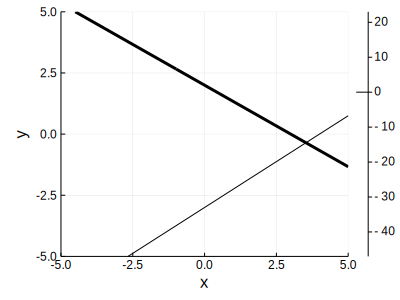

┌ Warning: Multiple series with different line width share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/pedrohnv/.julia/packages/Plots/h3o4c/src/backends/gr.jl:483


In [47]:
contour(-5:0.01:5, -5:0.01:5, f3, levels = [0], line = 3,  color=:black)
contour!(-5:0.01:5, -5:0.01:5, f4, levels = [0], xlabel = "x", ylabel = "y", size = (400, 300),  color=:black)

De acordo com o gráfico, o ponto solução do sistema de equações é aproximadamente $(3.5, -0.5)$

#### SOLUÇÃO SIMBÓLICA

**SymPy.jl**

A função `solve()` resolve sistemas de equações algébricas lineares e retorna um dicionário contendo as soluções do sistema do tipo `Sym`.

. Sintaxe:
```julia
solve([equação_1 , ..., equação_n] , [var_1,...,var_n])
```
Sendo:
* **`equação_1 , ..., equação_n`**: equações algébricas expressas como expressões simbólicas ou funções genéricas. Não funciona com funções anônimas.
* **`var_1, ..., var_n`**: variáveis das equações algébricas.

A função `solve()` retorna um vetor de dados simbólicos do tipo `SymPy.Sym`.

In [93]:
using SymPy
@syms x y

(x, y)

In [94]:
sol_sis = solve([f3(x,y) , f4(x,y) ], [x , y])

Dict{Any,Any} with 2 entries:
  y => -6/17
  x => 60/17

In [95]:
typeof(sol_sis)

Dict{Any,Any}

A função `solve()` retorna o resultado do tipo `Dict{SymPy.Sym,SymPy.Sym}`. É interessante converter o resultado para `Float`.

In [96]:
xs , ys = float(sol_sis[x]), float(sol_sis[y])

(3.5294117647058822, -0.35294117647058826)

Gráfico com os resultados:

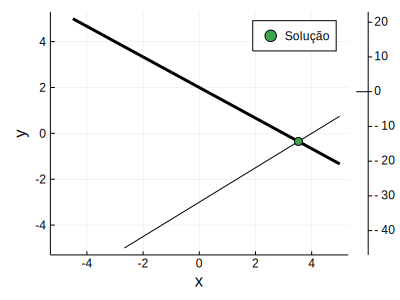

┌ Warning: Multiple series with different line width share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/pedrohnv/.julia/packages/Plots/h3o4c/src/backends/gr.jl:483


In [97]:
contour(-5:0.01:5, -5:0.01:5, f3, levels = [0], line = 3, color=:black)
contour!(-5:0.01:5, -5:0.01:5, f4, levels = [0], xlabel = "x", ylabel = "y", size = (400, 300), color=:black)
scatter!((xs, ys), label = "Solução")

In [98]:
?nsolve

search: nsolve linsolve Raizes_nsolve nonlinsolve



No documentation found.

`SymPy.nsolve` is a `Function`.

```
# 1 method for generic function "nsolve":
[1] nsolve(ex::SymPy.SymbolicObject, args...; kwargs...) in SymPy at /home/pedrohnv/.julia/packages/SymPy/u9Hkj/src/importexport.jl:120
```


#### SOLUÇÃO NUMÉRICA

**Depreciado:** há algum erro talvez proveniente de alterações na sintaxe.

In [99]:
nsol_sis = nsolve([f3(x,y) , f4(x,y) ], [x , y], [0, 1], prec = 7)

MethodError: MethodError: no method matching nsolve(::Array{Sym,1}, ::Array{Sym,1}, ::Array{Int64,1}; prec=7)
Closest candidates are:
  nsolve(!Matched::SymPy.SymbolicObject, ::Any...; kwargs...) at /home/pedrohnv/.julia/packages/SymPy/u9Hkj/src/importexport.jl:120

In [83]:
f3(x,y)

2⋅x + 3⋅y - 6

In [54]:
typeof(nsol_sis)

UndefVarError: UndefVarError: nsol_sis not defined

A função nsolve() retorna o resultado do tipo Array{Sym,1}. É interssante converter para um valor numérico (Ex: `Float`). Para acessar a solução $−0.3529412$ use:

In [55]:
nsol_sis[2]

UndefVarError: UndefVarError: nsol_sis not defined

### SISTEMAS DE EQUAÇÕES NÃO LINEARES

Exemplo: Resolver o seguinte sistema de equações não-lineares abaixo:

${\begin{cases}
& xy -2x ~~~~~~~~~ = 0 \\ 
&- x^2 + 8y -2 = 0 
\end{cases}}$

**Gráfico**

O gráfico permite observar o ponto de cruzamento das curvas que corresponde à solução do problema.  Será utilizado o pacote `Plots.jl` para gerar o gráfico.

In [56]:
# Funções genéricas
f5(x,y) = 3*x + cos(y)  - 5
f6(x,y) = -sin(x) + y - 2

f6 (generic function with 1 method)

In [57]:
using Plots
gr()

Plots.GRBackend()

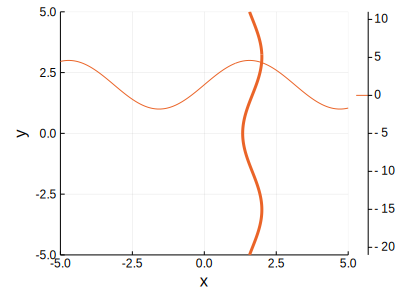

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/pedrohnv/.julia/packages/Plots/h3o4c/src/backends/gr.jl:483
┌ Warning: Multiple series with different line width share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/pedrohnv/.julia/packages/Plots/h3o4c/src/backends/gr.jl:483
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/pedrohnv/.julia/packages/Plots/h3o4c/src/backends/gr.jl:483


In [58]:
contour(-5:0.01:5, -5:0.01:5, f5, levels=[0], line = 3)
contour!(-5:0.01:5, -5:0.01:5, f6, levels=[0], xlabel = "x", ylabel="y", size = (400, 300))

De acordo com o gráfico, o ponto solução do sistema de equações é aproximadamente $(2.0, 3.0)$

#### SYMPY.JL

A função `nsolve()` resolve sistemas de equações algébricas não-lineares e retorna um vetor contendo as soluções do sistema do tipo `Sym`. Sintaxe: 
```julia
nsolve([eq_1,..., eq_n], [var_1,..., var_n], [valor_1,..., valor_n])
```
Sendo: 
* **[eq_1 , ..., eq_n]**: vetor das equações algébricas expressas por funções genéricas. Não funciona com funções anônimas;
* **[var_1, ..., var_n]**: vetor das variável das equações algébricas.
* **[valor_var_1,..., valor_var_n]**: vetor de soluções iniciais do sistema.

A função `nsolve()` retorna um vetor de dados simbólicos do tipo `SymPy.Sym`.

In [59]:
sol_nlsis = nsolve([f5(x, y) , f6(x, y) ],[x, y], [1, 1], prec = 10)

MethodError: MethodError: no method matching nsolve(::Array{Sym,1}, ::Array{Sym,1}, ::Array{Int64,1}; prec=10)
Closest candidates are:
  nsolve(!Matched::SymPy.SymbolicObject, ::Any...; kwargs...) at /home/pedrohnv/.julia/packages/SymPy/u9Hkj/src/importexport.jl:120

In [60]:
typeof(sol_nlsis)

UndefVarError: UndefVarError: sol_nlsis not defined

A função `nsolve()` retorna o resultado do tipo `Array{Sym,1}`. É interssante converter para um valor numérico (Ex: Float). Para acessar o valor $1.991319355$ use:

In [61]:
sol_nlsis[1]

UndefVarError: UndefVarError: sol_nlsis not defined

Gráfico com os resultados:

In [62]:
contour(-5:0.01:5, -5:0.01:5, f5, levels = [0], line = 3)
contour!(-5:0.01:5, -5:0.01:5, f6, levels = [0], xlabel = "x", ylabel = "y", size = (400, 300) )
scatter!((sol_nlsis[1], sol_nlsis[2]) , label = "Solução")

UndefVarError: UndefVarError: sol_nlsis not defined

#### SUNDIALS.JL

A função `Sundials.kinsol()` resolve sistemas de equações algébricas não-lineares e retorna um vetor contendo as soluções do sistema do tipo `Float64`. Sintaxe:
```julia
    function nome_sistema(função, var)
        função[1] = a_1*var[1] + b_1*var[2] + ... + k_1     
        função[2] = a_2*var[1] + b_2*var[2] + ... + k_2
        ...
        função[n] = a_n*var[1] + b_n*var[2] + ... + k_n  
    end
    
    Sundials.kinsol(nome_função, v_0)
```
Sendo:

* **nome_sistema**: nome da função correspondente ao sistema de equações;
* **função**:  sistema de equações;
* **função[1], função[2], função[n]**: funções do sistema de equações.
* **a, b, ... e k**:  constantes das equações. 
* **var[1] e var[2]**:  corresponde às variáveis do sistem de equações. `var[1]` corresponde à variável `x` e `var[2]` à variável `y`;
* **v_0**: vetor de soluções iniciais do sistema.

A função `Sundials.kinsol()` retorna um vetor de dados numéricos do tipo `Float64`.

In [63]:
using Sundials

ArgumentError: ArgumentError: Package Sundials not found in current path:
- Run `import Pkg; Pkg.add("Sundials")` to install the Sundials package.


In [64]:
function sistema_SD(f, x)
    f[1] = 3*x[1] + cos(x[2]) - 5    
    f[2] = -sin(x[1]) + x[2] - 2
end

sistema_SD (generic function with 1 method)

In [65]:
solSD = Sundials.kinsol(sistema_SD, [1.0, 1.0])

UndefVarError: UndefVarError: Sundials not defined

In [66]:
# para acessar somente o valor de X
solSD[1]

UndefVarError: UndefVarError: solSD not defined

In [67]:
# para acessar somente o valor de Y
solSD[2]

UndefVarError: UndefVarError: solSD not defined

#### NLSOLVE.JL

A função `nlsolve()` resolve sistemas de equações algébricas não-lineares e retorna um vetor contendo as soluções do sistema do tipo `SolverResults{Float64,Array{Float64,1},Array{Float64,1}}`. Sintaxe:
```julia
    function nome_sistema(função, var)
        função[1] = a_1*var[1] + b_1*var[2] + ... + k_1     
        função[2] = a_2*var[1] + b_2*var[2] + ... + k_2
        ...
        função[n] = a_n*var[1] + b_n*var[2] + ... + k_n  
    end
    
    Sundials.kinsol(nome_função, v_0)
```
Sendo:

* **nome_sistema**: nome da função correspondente ao sistema de equações;
* **função**:  sistema de equações;
* **função[1], função[2], função[n]**: funções do sistema de equações.
* **a, b, ... e k**:  constantes das equações. 
* **var[1] e var[2]**:  corresponde às variáveis do sistem de equações. `var[1]` corresponde à variável `x` e `var[2]` à variável `y`;
* **v_0**: vetor de soluções iniciais do sistema.

A função `nlsolve()` retorna um resultado do tipo `NLsolve.SolverResults{Float64})` e os dados podem ser acessados colocando " . " e completando com "tab". 

In [68]:
using NLsolve

ArgumentError: ArgumentError: Package NLsolve not found in current path:
- Run `import Pkg; Pkg.add("NLsolve")` to install the NLsolve package.


In [69]:
function sistema_NLS(f, x)
    f[1] = 3*x[1] + cos(x[2]) - 5    
    f[2] = -sin(x[1]) + x[2] - 2
end

sistema_NLS (generic function with 1 method)

In [70]:
solNLS = nlsolve(sistema_NLS, [ 1.0, 1.0])

UndefVarError: UndefVarError: nlsolve not defined

In [71]:
typeof(solNLS)

UndefVarError: UndefVarError: solNLS not defined

In [72]:
# para acessar somente os valores das soluções
solNLS.zero

UndefVarError: UndefVarError: solNLS not defined

In [73]:
# para acessar somente os o valor de x
solNLS.zero[1]

UndefVarError: UndefVarError: solNLS not defined

In [74]:
# para acessar somente a quantidade de interações
# menos interações, siginifica que o valor inicial foi melhor.
solNLS.iterations

UndefVarError: UndefVarError: solNLS not defined

## DOMÍNIO DE UMA INEQUAÇÃO

SymPy:
```
Ge - Maior igual (great equal)
Gt - Maior que   (great que)
Eq - Igual       (Equal)
Le - Menor igual (Less equal)
Lt - Menor que   (Less then)
Ne - Diferente   (not equal)
∧  - E  lógico
∨  - OU lógico
```

In [75]:
using SymPy
@syms x

(x,)

* **Inequação 1**

$\displaystyle {(x - 2)\over(x-1)} \geqslant 0$

In [76]:
solve( Ge((x - 2)/(x-1), 0), x)

(2 ≤ x ∧ x < ∞) ∨ (-∞ < x ∧ x < 1)

Explicando: Valores de `x` maiores ou igual a 2 e menores que infinito OU `x` maior que menos infinito e `x` menor que 1

* **Inequação 2**

$\displaystyle {(x - 2)\over(x-1)} > 0$

In [77]:
solve(Gt((x - 2)/(x-1),0), x)

(-∞ < x ∧ x < 1) ∨ (2 < x ∧ x < ∞)

* **Inequação 3**

$\displaystyle {(x - 2)\over(x-1)} \leqslant 0$

In [78]:
solve(Le((x - 2)/(x-1), 0), x)

x ≤ 2 ∧ 1 < x

* **Inequação 4**

$\displaystyle {(x - 2)\over(x-1)} < 0$

In [79]:
solve(Lt((x - 2)/(x-1), 0), x)

1 < x ∧ x < 2

* **Inequação 5**

$\displaystyle {(x - 2)\over(x-1)} \neq 0$

In [80]:
solve(Ne((x - 2)/(x-1), 0), x)

(1 < x ∧ x < 2) ∨ 2 < x ∨ x < 1

## REFERÊNCIAS BIBLIOGRÁFICAS


Rackauckas, C. & Nie, Q., (2017). **DifferentialEquations.jl – A Performant and Feature-Rich Ecosystem for Solving Differential Equations in Julia**. Journal of Open Research Software. 5(1), p.15.

A. C. Hindmarsh, P. N. Brown, K. E. Grant, S. L. Lee, R. Serban, D. E. Shumaker, and C. S. Woodward, **SUNDIALS: Suite of Nonlinear and Differential/Algebraic Equation Solvers**. ACM Transactions on Mathematical Software, 31(3), pp. 363-396, 2005. 
